Epoch 1/10
74/74 [==============================] - 11s 72ms/step - loss: 0.0046
Epoch 2/10
74/74 [==============================] - 5s 66ms/step - loss: 4.4948e-04
Epoch 3/10
74/74 [==============================] - 5s 67ms/step - loss: 4.0614e-04
Epoch 4/10
74/74 [==============================] - 5s 61ms/step - loss: 3.8032e-04
Epoch 5/10
74/74 [==============================] - 5s 63ms/step - loss: 3.7452e-04
Epoch 6/10
74/74 [==============================] - 6s 81ms/step - loss: 3.4389e-04
Epoch 7/10
74/74 [==============================] - 5s 65ms/step - loss: 3.1889e-04
Epoch 8/10
74/74 [==============================] - 5s 69ms/step - loss: 2.9844e-04
Epoch 9/10
74/74 [==============================] - 6s 78ms/step - loss: 2.8746e-04
Epoch 10/10
19/19 [==============================] - 2s 21ms/step


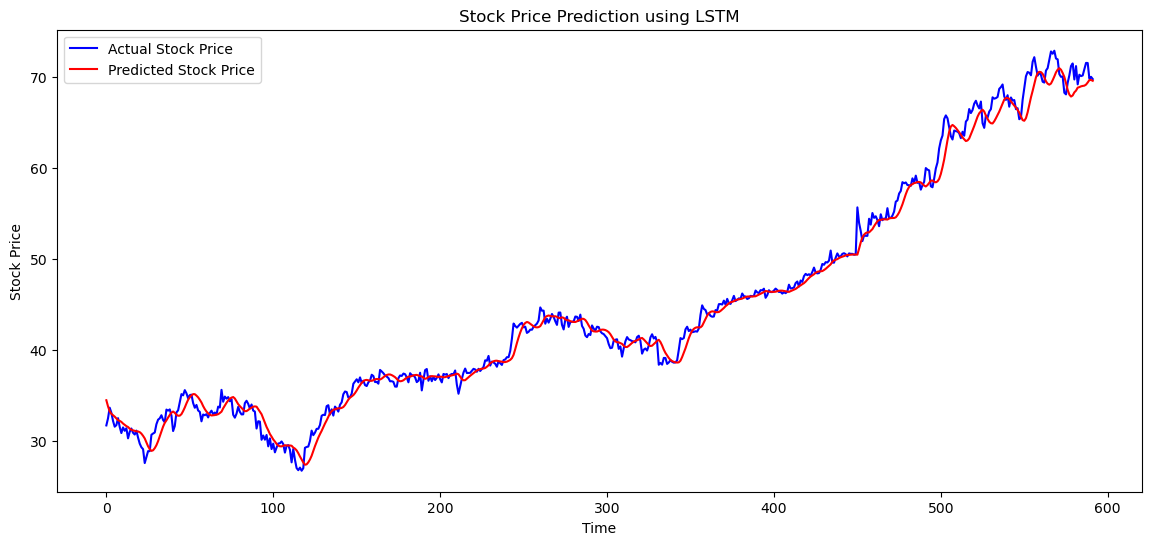

RMSE: 1.2182672515056878


In [3]:
#Stock Price Prediction Use LSTM models (LSTM is a type of Recurrent Neural Network (RNN) designed to handle long-term dependencies in sequence data,
#to forecast stock prices.Time Series Analysis, Deep Learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Load the dataset
data = pd.read_csv('C:/Users/User/Desktop/Python/Ivoyant Projects/Stock Price Prediction/AABA_2006-01-01_to_2018-01-01.csv', encoding='ISO-8859-1')

# Step 2: Preprocessing the dataset
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# We will predict closing prices, you can choose other columns too
data = data[['Close']]

# Step 3: Scaling the data (important for LSTM models)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Step 4: Create data for LSTM model
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create the dataset with a time step of 60 days
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshaping the data into the format LSTM expects (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Splitting data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 6: Build and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Predict the closing price

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step 8: Predicting stock prices
y_pred = model.predict(X_test)

# Rescale predictions and actual values back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Plot the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual Stock Price')
plt.plot(y_pred_rescaled, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Step 10: Evaluation metrics (RMSE)
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f'RMSE: {rmse}')

